In [ ]:
"""
Linear Regression and Exploratory data analysis
Created on Mon Mar 12 00:53:30 2018
@author: jahan
Tested with Python 2.7
Modified to work with Python 3.6 9/1/18 
Reference for the sample code on step-wise forward model: https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm
"""

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv

In [2]:
filePath = 'C:/Users/jg/Documents/MLData/'
filename = 'boston.csv'
names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
data = read_csv(filePath + filename)
data1 = data.drop(data.columns[0], axis=1) # when dataframe is read it generates a new index column, this will remove the extra column, check data in variable explorer
# save features as pandas dataframe for stepwise feature selection
X1 = data1.drop(data1.columns[13], axis = 1)
Y1 = data1.drop(data1.columns[0:13], axis = 1)
# separate features and response into two different arrays

In [3]:
Y = Y1.values
X = X1.values
# First perform exploratory data analysis using correlation and scatter plot
# look at the first 20 rows of data
peek = data1.head(20)
print(peek)

       crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [4]:
# descriptive statistics: mean, max, min, count, 25 percentile, 50 percentile, 75 percentile
# set_option commands needs updating
set_option('display.width', 100)
set_option('precision', 1)
description = data.describe()
print(description)

       Unnamed: 0     crim     zn  indus     chas    nox     rm    age    dis    rad    tax  \
count       506.0  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0  506.0   
mean        253.5  3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5  408.2   
std         146.2  8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7  168.5   
min           1.0  6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0  187.0   
25%         127.2  8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0  279.0   
50%         253.5  2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0  330.0   
75%         379.8  3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0  666.0   
max         506.0  8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0  711.0   

       ptratio  black  lstat   medv  
count    506.0  506.0  506.0  506.0  
mean      18.5  356.7   12.7   22.5  
std        2.2   91.3    7.1  

<Figure size 432x288 with 0 Axes>

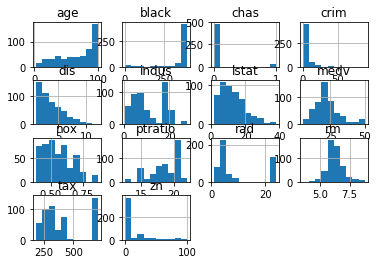

In [5]:
# we look at the distribution of data and its descriptive statistics
plt.figure() # new plot
data1.hist()
plt.show()

            crim       zn    indus     chas      nox       rm      age      dis      rad      tax  \
crim     1.0e+00 -2.0e-01  4.1e-01 -5.6e-02  4.2e-01 -2.2e-01  3.5e-01 -3.8e-01  6.3e-01  5.8e-01   
zn      -2.0e-01  1.0e+00 -5.3e-01 -4.3e-02 -5.2e-01  3.1e-01 -5.7e-01  6.6e-01 -3.1e-01 -3.1e-01   
indus    4.1e-01 -5.3e-01  1.0e+00  6.3e-02  7.6e-01 -3.9e-01  6.4e-01 -7.1e-01  6.0e-01  7.2e-01   
chas    -5.6e-02 -4.3e-02  6.3e-02  1.0e+00  9.1e-02  9.1e-02  8.7e-02 -9.9e-02 -7.4e-03 -3.6e-02   
nox      4.2e-01 -5.2e-01  7.6e-01  9.1e-02  1.0e+00 -3.0e-01  7.3e-01 -7.7e-01  6.1e-01  6.7e-01   
rm      -2.2e-01  3.1e-01 -3.9e-01  9.1e-02 -3.0e-01  1.0e+00 -2.4e-01  2.1e-01 -2.1e-01 -2.9e-01   
age      3.5e-01 -5.7e-01  6.4e-01  8.7e-02  7.3e-01 -2.4e-01  1.0e+00 -7.5e-01  4.6e-01  5.1e-01   
dis     -3.8e-01  6.6e-01 -7.1e-01 -9.9e-02 -7.7e-01  2.1e-01 -7.5e-01  1.0e+00 -4.9e-01 -5.3e-01   
rad      6.3e-01 -3.1e-01  6.0e-01 -7.4e-03  6.1e-01 -2.1e-01  4.6e-01 -4.9e-01  1.0e+00  9

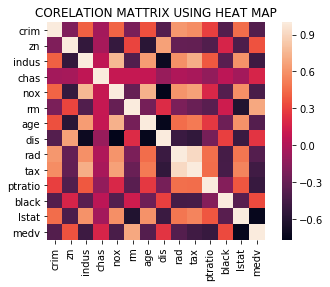

<Figure size 432x288 with 0 Axes>

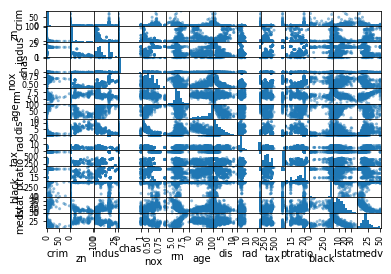

In [11]:
# correlation heat map, pay attention to correlation between all predicators/features and each predictor and the output
plt.figure() # new plot
corMat = data1.corr(method='pearson')
print(corMat)
## plot correlation matrix as a heat map
sns.heatmap(corMat, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORELATION MATTRIX USING HEAT MAP")
plt.show()
#
## scatter plot of all data
plt.figure()
scatter_matrix(data1)
plt.show()

In [21]:
"""
By observing the preliminary analysis it is obvious that some of the features 
are correlated with each other (colinearity). The ad-hoc appraoch is to keep
only one of the highly correlated features. This approach is only mathematically correct
if the features are identical. Otherwise it is not accurate but good enough for 
a preliminary analysis. The feature selection method described below are two 
approaches that both were discussed in class. Step-wise forward method using
RSS or MSE and  the p-value method. There is a third method and that is called
recursive feature elimination very similar in nature to forward method. Pay attention
that the two methods do not necessarily end up with the same model if the 
parameters happen to be the same number. This has to do with the method of
arriving at the response. The forward method in this case is less accurate since
it is based on p-value only.  

"""
# Determiniation of dominant features , Method one Recursive Model Elimination, 
# very similar idea to foreward selection but done recurssively. This method is gready
# which means it tries one feature at the time
NUM_FEATURES = 13 # this is kind of arbitrary but you should get an idea by observing the scatter plots and correlation.
model = LinearRegression()
#rfe = RFE(model, NUM_FEATURES)
rfe = RFE(model, n_features_to_select = NUM_FEATURES)
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(X,Y)
print("Model Score with selected features is: ", score)

Num Features: 13
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1]
Model Score with selected features is:  0.7406426641094094


C:\Users\jahan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


stepwise forward-backward selection
need to change the input types as X in this function needs to be a pandas
dataframe

In [24]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [26]:
result = stepwise_selection(X1, Y)

C:\Users\jahan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  lstat                          with p-value 5.0811e-88
Add  rm                             with p-value 3.47226e-27
Add  ptratio                        with p-value 1.64466e-14
Add  dis                            with p-value 1.66847e-05
Add  nox                            with p-value 5.48815e-08
Add  chas                           with p-value 0.000265473
Add  black                          with p-value 0.000771946
Add  zn                             with p-value 0.00465162


In [28]:
print('resulting features:')
print(result)

resulting features:
['lstat', 'rm', 'ptratio', 'dis', 'nox', 'chas', 'black', 'zn']
